<a href="https://colab.research.google.com/github/VOLETAHF/KLASIFIKASI-KANKER-PAYUDARA-NAIVE-BAYES/blob/main/DATMIN_TUGAS_NAIVE_BAYES_DAN_KNN_VOLETA_HF_4101422119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
BreastCancerData=pd.read_csv('Breast_cancer_data (1).csv')

# Pre Processing Data

In [8]:
BreastCancerData.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
BreastCancerData.tail(15)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
554,12.880,28.92,82.50,514.3,0.08123,1
555,10.290,27.61,65.67,321.4,0.09030,1
556,10.160,19.59,64.73,311.7,0.10030,1
557,9.423,27.88,59.26,271.3,0.08123,1
558,14.590,22.68,96.39,657.1,0.08473,1
559,11.510,23.93,74.52,403.5,0.09261,1
560,14.050,27.15,91.38,600.4,0.09929,1
561,11.200,29.37,70.67,386.0,0.07449,1
562,15.220,30.62,103.40,716.9,0.10480,0
563,20.920,25.09,143.00,1347.0,0.10990,0


Informasi tipe data dan cek keberadaan missing values pada dataset

In [10]:
BreastCancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Cek missing values dan jumlah missing values di setiap kolom

In [11]:
BreastCancerData.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


Dataset ini memiliki total pengamatan 767

In [12]:
np.sum(BreastCancerData.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [13]:
#mengetahui jumlah missing value di seluruh dataset
BreastCancerData.isnull().sum().sum()

np.int64(0)

## Identifikasi outlier dalam dataset

Identifikasi outlier melalui visualisasi distribusi dan outlier

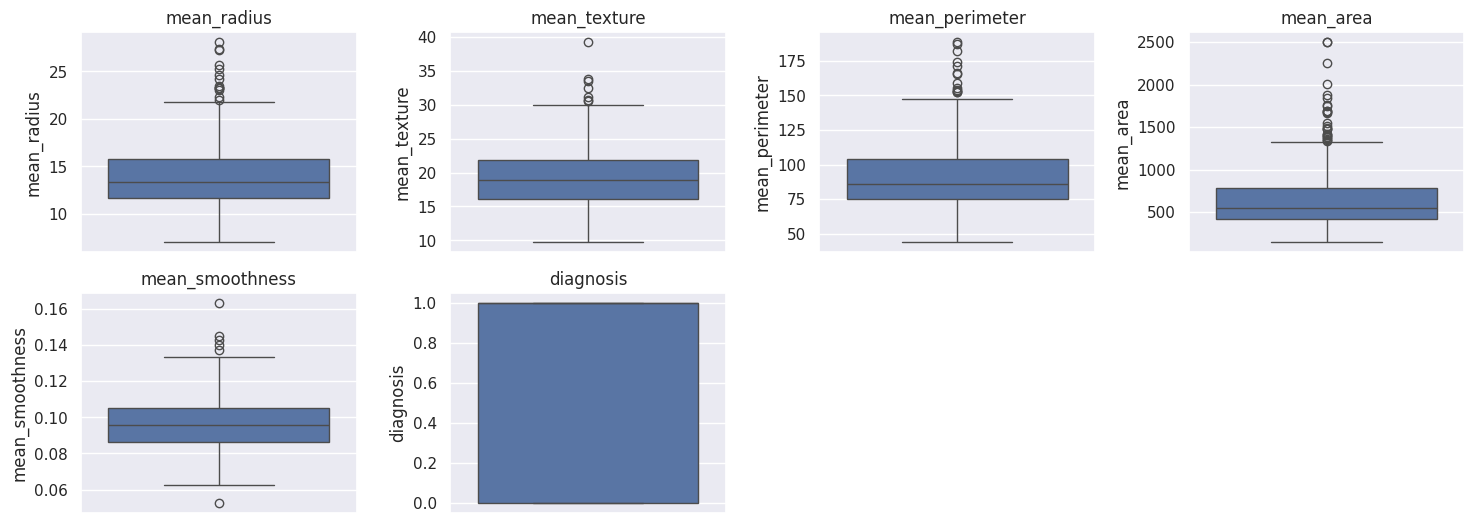

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=BreastCancerData[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
def detect_outliers_iqr(BreastCancerData, column):
    Q1 = BreastCancerData[column].quantile(0.25)  # Kuartil 1
    Q3 = BreastCancerData[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return BreastCancerData[(BreastCancerData[column] < lower_bound) | (BreastCancerData[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(BreastCancerData, col)
    print(f"{col}: {len(outliers)} outliers")

mean_radius: 14 outliers
mean_texture: 7 outliers
mean_perimeter: 13 outliers
mean_area: 25 outliers
mean_smoothness: 6 outliers
diagnosis: 0 outliers


# Outlier ditangangi dengan metode winsorizing.

In [16]:
def winsorize_iqr(BreastCancerData, column):
    Q1 = BreastCancerData[column].quantile(0.25)
    Q3 = BreastCancerData[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    BreastCancerData[column] = np.where(BreastCancerData[column] < lower_bound, lower_bound, BreastCancerData[column])
    BreastCancerData[column] = np.where(BreastCancerData[column] > upper_bound, upper_bound, BreastCancerData[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(BreastCancerData, col)

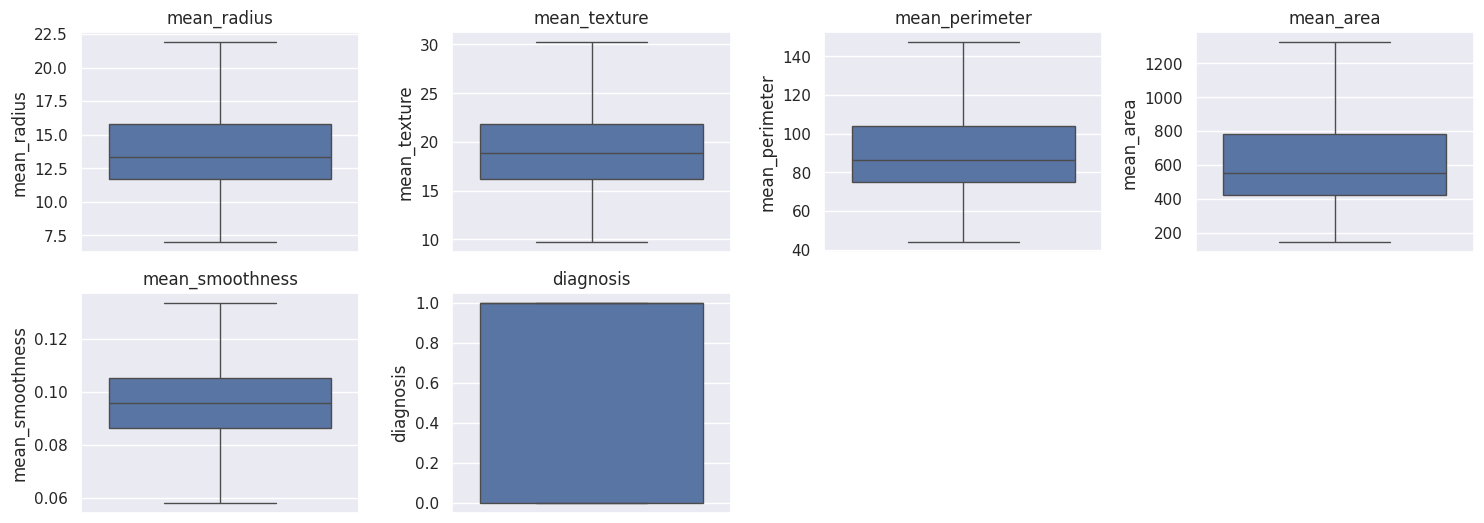

In [17]:
#cek boxplot lagi

num_cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=BreastCancerData[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Klasifikasi menggunakan Naive Bayes dan KNN

In [18]:
count_values = BreastCancerData['diagnosis'].value_counts()
count_values

,count
diagnosis,
1.0,357
0.0,212


In [19]:
# Menghitung rata-rata berdasarkan nilai 'diagnosis'
mean_by_diagnosis = BreastCancerData.groupby('diagnosis').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'diagnosis'
print(mean_by_diagnosis)

           mean_radius  mean_texture  mean_perimeter   mean_area  \
diagnosis                                                          
0.0          17.290047     21.530259      114.224033  937.784434   
1.0          12.146524     17.903445       78.075406  462.790196   

           mean_smoothness  
diagnosis                   
0.0               0.102776  
1.0               0.092400  


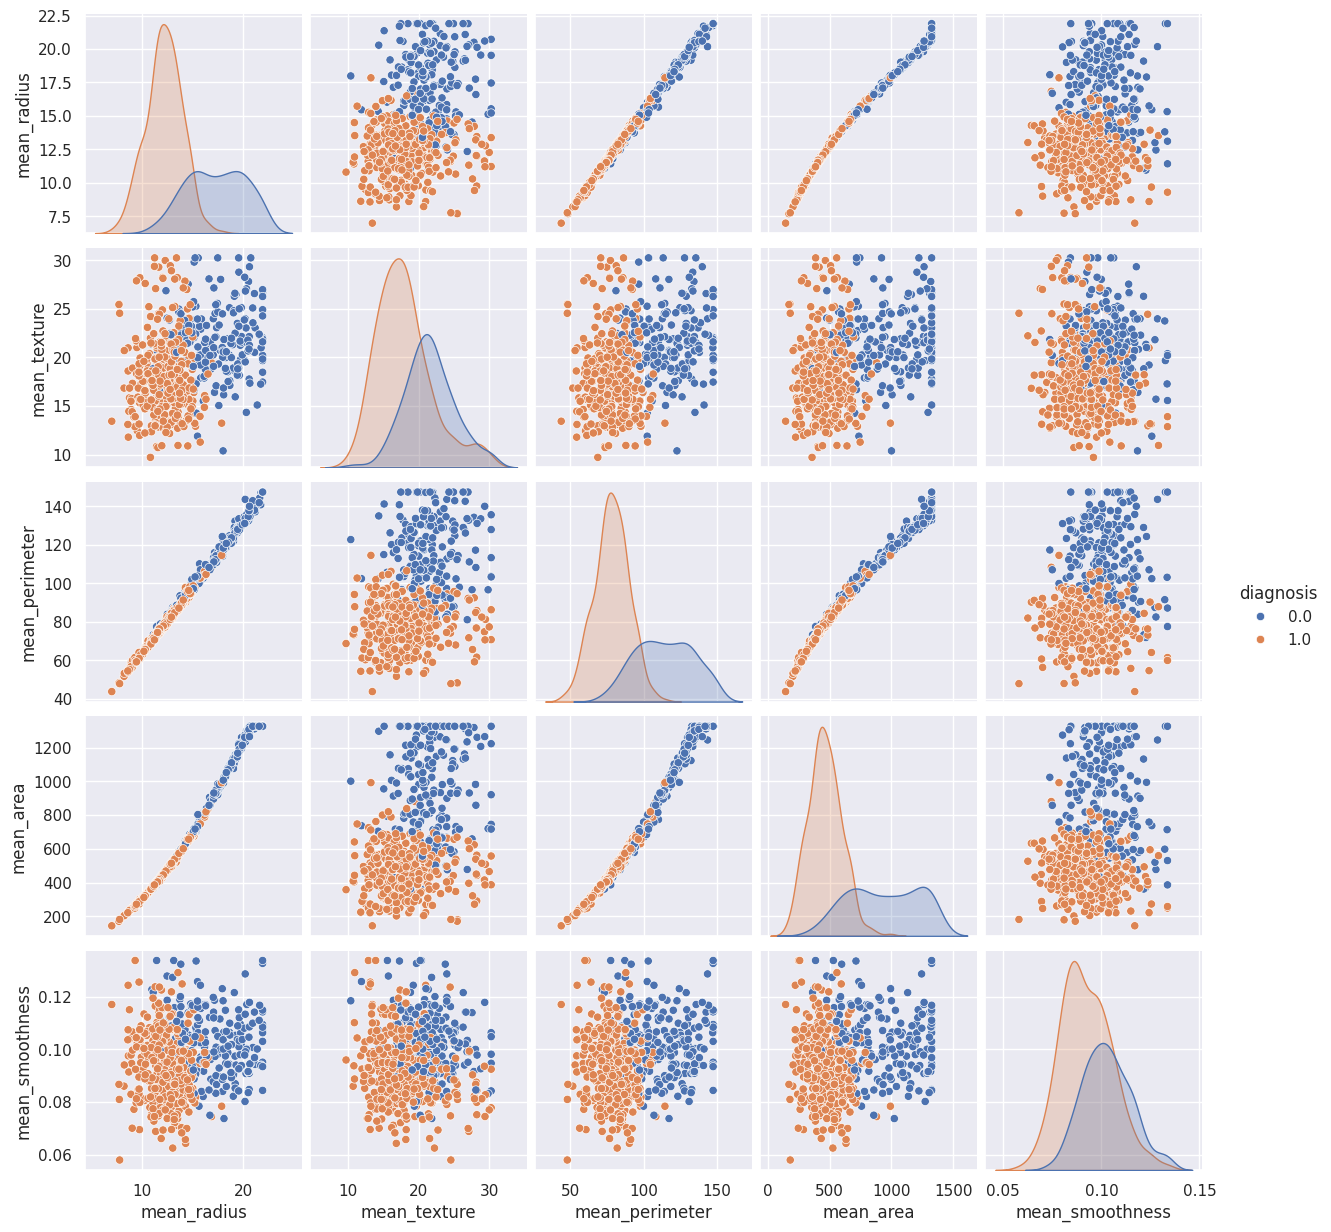

In [20]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah termasuk kanker payudara jinak atau ganas
sns.pairplot(BreastCancerData, vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], hue='diagnosis')

In [21]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'diagnosis'
correlation_with_diagnosis = BreastCancerData.corr()['diagnosis'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'diagnosis'
print(correlation_with_diagnosis)

diagnosis          1.000000
mean_smoothness   -0.366931
mean_texture      -0.419123
mean_radius       -0.745217
mean_area         -0.752786
mean_perimeter    -0.759006
Name: diagnosis, dtype: float64


# Memisahkan variabel X dan Y

In [22]:
#memisahkan data menjadi variabel x dan y
X=BreastCancerData.drop(['diagnosis'], axis=1)
y=BreastCancerData['diagnosis']

# MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.20571084 0.38081325 0.19883323 0.14144403 0.56424987]
 [0.2559823  0.59751644 0.24106842 0.1829557  0.39665874]
 [0.61391514 0.25079133 0.58348199 0.55503889 0.4883122 ]
 ...
 [0.16455527 0.41928415 0.15457307 0.11422049 0.56689118]
 [0.18359139 0.41441441 0.16334796 0.12225228 0.15220549]
 [0.30357263 0.69247626 0.2963213  0.21981738 0.45740887]]


# NAIVE BAYES

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [26]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.9032967032967033

In [28]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9298


# Proses membuat model dengan Neural Network

In [30]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [31]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'max_iter': 200}


In [32]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88        47
         1.0       0.88      0.99      0.93        67

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



In [35]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.912

Output 0.921 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.921 berarti bahwa model berhasil memprediksi dengan benar sekitar 92,1% dari semua sampel pada data uji (y_test) yang telah digunakan.

[[38  9]
 [ 1 66]]
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88        47
         1.0       0.88      0.99      0.93        67

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



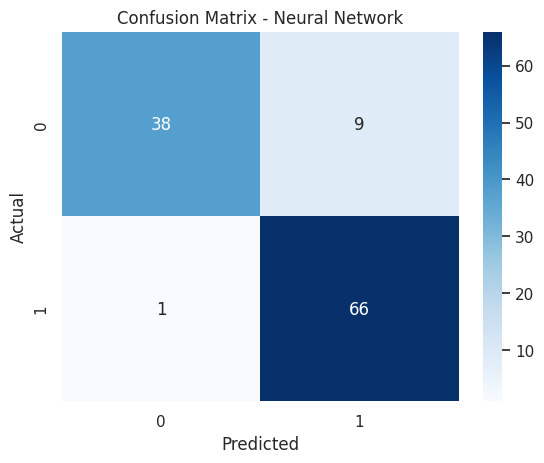

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()